# Data Gathering, Scraping, Munging and Cleaning for StockAssist

## Introduction
Here, we are searching for authentic sources of data which will be useful for analyzing stock market data. These sources need to be verified in order to generate an accurate analysis upon the stocks. First of all, these multiple data sources need to be scraped in the format available. Once we obtain all the data from multiple data sources, this raw data is supposed to be refined into content or formats better suited for consumption for our database. Finally, this data is cleaned by detecting corrupt or inaccurate records from the dataset and then replacing, modifying or deleting this coarse data. 

## Data Scraping
Data Scraping is a technique used to extract data from the internet into a file or spreadsheet. We will be scraping data from the following three sources:
- Data Scraping from a CSV File
- Web Scraping
- Data Scraping using an API

### Data Scraping from a CSV File

In [1]:
import pandas as pd
import mysql.connector # Library required for connecting to the MySQL Database
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Connecting to the MySQL Database
mydb = mysql.connector.connect(host='localhost', user = 'root', passwd = 'Northeastern@NEU10', database = 'stockassist')
mycursor = mydb.cursor()

In [3]:
# Read data from the CSV file and insert it into a DataFrame
csv_df = pd.read_csv('Ticker_Master.csv')

In [4]:
# Display data in the DataFrame
csv_df.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2013 (1888)
4,ABMD,Abiomed,Health Care,Health Care Equipment,"Danvers, Massachusetts",1981


### Web Scraping
We will be performing web scraping using Beautiful Soup which is a Python library for extracting data from HTML and XML files. It works with the parser to provide idiomatic ways of navigating, searching and modifying the parse tree.

In [5]:
import requests # Library required to send HTTP requests
from bs4 import BeautifulSoup # Library required for performing web scraping using Beautiful Soup

In [6]:
# Sending HTTP request to the webpage which is supposed to be scraped
request = requests.get('https://www.marketbeat.com/types-of-stock/sp-500-stocks/')

In [7]:
# Connecting to the webpage via Beautiful Soup using the HTML parser
soup = BeautifulSoup(request.content, 'html.parser')

In [8]:
# Converting Beautiful Soup parse tree into a nicely formatted Unicode string
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <title>
   S&amp;P 500 Stocks | List of Companies
  </title>
  <meta charset="utf-8"/>
  <meta content="width=device-width, height=device-height, initial-scale=1.0" name="viewport"/>
  <!--[if IE]><meta http-equiv="X-UA-Compatible" content="IE=edge" /><![endif]-->
  <meta content="21tyd2NTsebvto7W56gttKaElQtkak0Ld32xGvr_COs" name="google-site-verification"/>
  <meta content="43C334F81BEB9DE14F872D6C91B4FC29" name="msvalidate.01"/>
  <meta content="63e01d3704030089" name="y_key"/>
  <meta content="1450892295227696" property="fb:pages"/>
  <meta content="#24778c" name="theme-color"/>
  <meta content="app-id=917482225" name="apple-itunes-app"/>
  <meta content="max-image-preview:large" name="robots"/>
  <link href="https://www.marketbeat.com/Sitemap.ashx" rel="sitemap" title="Sitemap" type="application/xml"/>
  <link href="https://www.marketbeat.com/rss.ashx?type=headlines" rel="alternate" title="MarketBeat Headlines RSS" type="application/rss+xm

In [9]:
# Searching for 'table' tags inside the Unicode string
table = soup.find('table', attrs = {'class':'scroll-table sort-table'})
table

<table class="scroll-table sort-table"><thead><tr><th data-clean="Symbol|Company" data-sort="string">Company</th><th data-clean="Current Price|Price Change" data-sort="float">Current Price</th><th data-sort="float">PE Ratio</th><th data-sort="float">Market Cap</th><th data-sort="float">Volume</th><th data-sort="float">Average Volume</th><th data-sort="string">Indicator(s)</th></tr></thead><tbody><tr><td data-clean="AAPL|Apple"><a class="nounderline" href="/stocks/NASDAQ/AAPL/"><div class="company-thumbnail"><img alt="Apple Inc. stock logo" height="53" loading="lazy" src="https://www.marketbeat.com/logos/thumbnail/apple-inc-logo.png" width="80"/></div><div class="ticker-area">AAPL</div><div class="title-area">Apple</div></a></td><td data-clean="$142.17|0.0%">$142.17<br/><span class="c-green">+0.0%</span></td><td data-sort-value="23.2684124386252">23.27</td><td data-sort-value="2261656.994">$2.26 trillion</td><td data-sort-value="1257108">1.26 million</td><td data-sort-value="88065969">8

In [10]:
# Initialize lists to hold the Table details
headers = []
data = []

In [11]:
# Fetching headers using the 'th' tags inside the 'tr' tags
table_headers = soup.thead
for x in table_headers.findAll('tr'):
    for y in x.findAll('th'):
        headers.append(y.text)

In [12]:
headers

['Company',
 'Current Price',
 'PE Ratio',
 'Market Cap',
 'Volume',
 'Average Volume',
 'Indicator(s)']

In [13]:
# Fetching table data using the 'td' tags inside the 'tr' tags
table_body = soup.tbody
for i in table_body.findAll('tr')[1:]:
    td_tags = i.findAll('td')
    td_val = [j.get_text(separator = ',') for j in td_tags]
    data.append(td_val)

In [14]:
data

[['MSFT,Microsoft',
  '$250.29,+2.0%',
  '26.97',
  '$1.87 trillion',
  '708,717',
  '31.24 million',
  'Analyst Report,Short Interest ↑'],
 ['GOOG,Alphabet',
  '$92.43,-0.7%',
  '18.36',
  '$1.20 trillion',
  '686,154',
  '28.87 million',
  'Short Interest ↓'],
 ['GOOGL,Alphabet',
  '$92.15,-0.7%',
  '18.30',
  '$1.19 trillion',
  '542,311',
  '35.08 million',
  ''],
 ['AMZN,Amazon.com',
  '$88.81,-0.3%',
  '81.51',
  '$906.01 billion',
  '997,935',
  '76.14 million',
  'Short Interest ↓'],
 ['TSLA,Tesla',
  '$170.75,-4.6%',
  '52.76',
  '$539.19 billion',
  '1.45 million',
  '82.31 million',
  ''],
 ['UNH,UnitedHealth Group',
  '$543.63,+0.8%',
  '26.62',
  '$507.94 billion',
  '50,806',
  '3.14 million',
  'Insider Selling'],
 ['JNJ,Johnson & Johnson',
  '$176.47,+0.4%',
  '24.58',
  '$461.38 billion',
  '87,660',
  '7.32 million',
  'Analyst Report'],
 ['XOM,Exxon Mobil',
  '$105.38,+1.8%',
  '8.60',
  '$433.99 billion',
  '379,872',
  '25.79 million',
  'Short Interest ↑'],
 ['NVD

In [15]:
# Inserting the Table data with the headers inside the DataFrame
web_df = pd.DataFrame(data, columns = headers)

In [16]:
# Display the DataFrame after Web Scraping
web_df.head()

,Company,Current Price,PE Ratio,Market Cap,Volume,Average Volume,Indicator(s)
0,"MSFT,Microsoft","$250.29,+2.0%",26.97,$1.87 trillion,"708,717",31.24 million,"Analyst Report,Short Interest ↑"
1,"GOOG,Alphabet","$92.43,-0.7%",18.36,$1.20 trillion,"686,154",28.87 million,Short Interest ↓
2,"GOOGL,Alphabet","$92.15,-0.7%",18.30,$1.19 trillion,"542,311",35.08 million,
3,"AMZN,Amazon.com","$88.81,-0.3%",81.51,$906.01 billion,"997,935",76.14 million,Short Interest ↓
4,"TSLA,Tesla","$170.75,-4.6%",52.76,$539.19 billion,1.45 million,82.31 million,


### Data Scraping using API
We will be scraping stock market prices data from the Yahoo Finance API. The Yahoo Finance API is used to obtain historical and real time data for a variety of financial markets and products. yfinance is a popular open source library which is free and easy to setup with high granularity of data.

In [17]:
import yfinance as yf # Library required for connecting to the Yahoo Finance API

In [18]:
# Generate daily OHLC data for the tickers
ticker_list = ['AAPL', 'MSFT', 'AMZN', 'TSLA']
daily_df = yf.download(ticker_list, group_by='Ticker', period='11mo', interval='1d')
daily_df = daily_df.stack(level=0).rename_axis(['Date', 'Ticker']).reset_index(level=1)

[*********************100%***********************]  4 of 4 completed


In [19]:
daily_df.head()

,Ticker,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2022-01-12,AAPL,174.517136,175.529999,177.179993,174.820007,176.119995,74805200
2022-01-12,AMZN,165.207001,165.207001,166.878006,164.417007,166.574997,50030000
2022-01-12,MSFT,315.315430,318.269989,323.410004,317.079987,319.670013,34372200
2022-01-12,TSLA,368.739990,368.739990,371.613342,357.529999,359.616669,83739000
2022-01-13,AAPL,171.196411,172.190002,176.619995,171.789993,175.779999,84505800


In [20]:
# Generate daily OHLC data for the tickers
ticker_list = ['AAPL', 'MSFT', 'AMZN', 'TSLA']
hourly_df = yf.download(ticker_list, group_by='Ticker', period='1d', interval='1h')
hourly_df = hourly_df.stack(level=0).rename_axis(['Date', 'Ticker']).reset_index(level=1)

[*********************100%***********************]  4 of 4 completed


In [21]:
hourly_df.head()

,Ticker,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2022-12-12 09:30:00,AAPL,142.125000,142.125000,142.880005,141.639999,142.750000,12413959.0
2022-12-12 09:30:00,AMZN,88.535004,88.535004,89.400002,88.410103,89.385002,12155530.0
2022-12-12 09:30:00,MSFT,250.779907,250.779907,252.160004,245.419998,245.419998,6879444.0
2022-12-12 09:30:00,TSLA,172.244995,172.244995,179.050003,170.949997,177.000000,25850596.0
2022-12-12 10:30:00,AAPL,142.130005,142.130005,142.470001,141.059998,142.125000,9867207.0


## Data Munging
Data Munging (or Data Wrangling) is the process of preparing your data for a dedicated purpose - taking the data from its raw state and transforming and mapping into another format, normally for use beyond its original intent.

### Data Munging on CSV DataFrame

In [22]:
csv_df.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2013 (1888)
4,ABMD,Abiomed,Health Care,Health Care Equipment,"Danvers, Massachusetts",1981


In [23]:
# Renaming columns for further processing
csv_df=csv_df.rename(columns = {'Headquarters Location':'Location'})

In [24]:
csv_df.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Location,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2013 (1888)
4,ABMD,Abiomed,Health Care,Health Care Equipment,"Danvers, Massachusetts",1981


In [25]:
# Splitting the 'Location' column into two columns for more authenticity
csv_df1 = pd.DataFrame(csv_df.Location.str.split(',',1).tolist(), columns = ['Headquarters','City'])

In [26]:
csv_df1

,Headquarters,City
0,Saint Paul,Minnesota
1,Milwaukee,Wisconsin
2,North Chicago,Illinois
3,North Chicago,Illinois
4,Danvers,Massachusetts
...,...,...
498,Louisville,Kentucky
499,Lincolnshire,Illinois
500,Warsaw,Indiana
501,Salt Lake City,Utah


In [27]:
# Replace the 'Location' column with 'Headquarters'
csv_df['Location'] = csv_df1['Headquarters']
# Insert the 'City' column
csv_df.insert(5, 'City', csv_df1['City'])

In [28]:
# Display CSV DataFrame after performing Data Munging
csv_df.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Location,City,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,Saint Paul,Minnesota,1902
1,AOS,A. O. Smith,Industrials,Building Products,Milwaukee,Wisconsin,1916
2,ABT,Abbott,Health Care,Health Care Equipment,North Chicago,Illinois,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,North Chicago,Illinois,2013 (1888)
4,ABMD,Abiomed,Health Care,Health Care Equipment,Danvers,Massachusetts,1981


### Data Munging on Web Scraping DataFrame

In [29]:
web_df.head()

,Company,Current Price,PE Ratio,Market Cap,Volume,Average Volume,Indicator(s)
0,"MSFT,Microsoft","$250.29,+2.0%",26.97,$1.87 trillion,"708,717",31.24 million,"Analyst Report,Short Interest ↑"
1,"GOOG,Alphabet","$92.43,-0.7%",18.36,$1.20 trillion,"686,154",28.87 million,Short Interest ↓
2,"GOOGL,Alphabet","$92.15,-0.7%",18.30,$1.19 trillion,"542,311",35.08 million,
3,"AMZN,Amazon.com","$88.81,-0.3%",81.51,$906.01 billion,"997,935",76.14 million,Short Interest ↓
4,"TSLA,Tesla","$170.75,-4.6%",52.76,$539.19 billion,1.45 million,82.31 million,


In [30]:
# Renaming columns for further processing
web_df = web_df.rename(columns = {'Current Price':'Price'})
web_df = web_df.rename(columns = {'Market Cap':'Market_Cap'})
web_df = web_df.rename(columns = {'PE Ratio':'PE_Ratio'})
web_df = web_df.rename(columns = {'Average Volume':'Average_Volume'})

In [31]:
# Splitting the 'Company' column into 'Symbol' and 'Company' columns for more authenticity
web_df1 = pd.DataFrame(web_df.Company.str.split(',',1).tolist(), columns = ['Symbol','Company'])

In [32]:
web_df1.head()

,Symbol,Company
0,MSFT,Microsoft
1,GOOG,Alphabet
2,GOOGL,Alphabet
3,AMZN,Amazon.com
4,TSLA,Tesla


In [33]:
# Splitting the 'Price' column into 'Price' and 'Price_Change_Percent' columns for more authenticity
web_df2 = pd.DataFrame(web_df.Price.str.split(',',1).tolist(), columns = ['Price','Price_Change_Percent'])
web_df2['Price'] = web_df2['Price'].str.replace('$', '')

C:\Users\Yash\AppData\Local\Temp\ipykernel_18644\775149396.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  web_df2['Price'] = web_df2['Price'].str.replace('$', '')


In [34]:
web_df2.head()

,Price,Price_Change_Percent
0,250.29,+2.0%
1,92.43,-0.7%
2,92.15,-0.7%
3,88.81,-0.3%
4,170.75,-4.6%


In [35]:
web_df

,Company,Price,PE_Ratio,Market_Cap,Volume,Average_Volume,Indicator(s)
0,"MSFT,Microsoft","$250.29,+2.0%",26.97,$1.87 trillion,"708,717",31.24 million,"Analyst Report,Short Interest ↑"
1,"GOOG,Alphabet","$92.43,-0.7%",18.36,$1.20 trillion,"686,154",28.87 million,Short Interest ↓
2,"GOOGL,Alphabet","$92.15,-0.7%",18.30,$1.19 trillion,"542,311",35.08 million,
3,"AMZN,Amazon.com","$88.81,-0.3%",81.51,$906.01 billion,"997,935",76.14 million,Short Interest ↓
4,"TSLA,Tesla","$170.75,-4.6%",52.76,$539.19 billion,1.45 million,82.31 million,
...,...,...,...,...,...,...,...
494,"LNC,Lincoln National","$32.01,+1.1%",N/A,$5.42 billion,"46,794",1.82 million,Short Interest ↓
495,"PENN,PENN Entertainment","$33.97,+2.9%",23.92,$5.27 billion,"42,970",3.90 million,Short Interest ↑
496,"PVH,PVH","$73.04,-0.5%",11.58,$4.76 billion,"17,751",1.44 million,
497,"VNO,Vornado Realty Trust","$22.12,+0.1%",44.24,$4.24 billion,"44,294",2.16 million,"Short Interest ↑,Positive News"


In [36]:
# Dropping unwanted columns from the dataframe
web_df = web_df.drop(['Company', 'Price', 'Indicator(s)'], axis=1)
# Manipulating column into appropriate format for insertion
web_df['Market_Cap'] = web_df['Market_Cap'].str.replace('$', '')

C:\Users\Yash\AppData\Local\Temp\ipykernel_18644\2257351460.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  web_df['Market_Cap'] = web_df['Market_Cap'].str.replace('$', '')


In [37]:
# Concatenate all the DataFrames into a single DataFrame
final_web_df = pd.concat([web_df1, web_df2, web_df], axis=1)

In [38]:
final_web_df

,Symbol,Company,Price,Price_Change_Percent,PE_Ratio,Market_Cap,Volume,Average_Volume
0,MSFT,Microsoft,250.29,+2.0%,26.97,1.87 trillion,"708,717",31.24 million
1,GOOG,Alphabet,92.43,-0.7%,18.36,1.20 trillion,"686,154",28.87 million
2,GOOGL,Alphabet,92.15,-0.7%,18.30,1.19 trillion,"542,311",35.08 million
3,AMZN,Amazon.com,88.81,-0.3%,81.51,906.01 billion,"997,935",76.14 million
4,TSLA,Tesla,170.75,-4.6%,52.76,539.19 billion,1.45 million,82.31 million
...,...,...,...,...,...,...,...,...
494,LNC,Lincoln National,32.01,+1.1%,N/A,5.42 billion,"46,794",1.82 million
495,PENN,PENN Entertainment,33.97,+2.9%,23.92,5.27 billion,"42,970",3.90 million
496,PVH,PVH,73.04,-0.5%,11.58,4.76 billion,"17,751",1.44 million
497,VNO,Vornado Realty Trust,22.12,+0.1%,44.24,4.24 billion,"44,294",2.16 million


### Data Munging on API DataFrame

In [39]:
daily_df.head()

,Ticker,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2022-01-12,AAPL,174.517136,175.529999,177.179993,174.820007,176.119995,74805200
2022-01-12,AMZN,165.207001,165.207001,166.878006,164.417007,166.574997,50030000
2022-01-12,MSFT,315.315430,318.269989,323.410004,317.079987,319.670013,34372200
2022-01-12,TSLA,368.739990,368.739990,371.613342,357.529999,359.616669,83739000
2022-01-13,AAPL,171.196411,172.190002,176.619995,171.789993,175.779999,84505800


In [40]:
hourly_df.head()

,Ticker,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2022-12-12 09:30:00,AAPL,142.125000,142.125000,142.880005,141.639999,142.750000,12413959.0
2022-12-12 09:30:00,AMZN,88.535004,88.535004,89.400002,88.410103,89.385002,12155530.0
2022-12-12 09:30:00,MSFT,250.779907,250.779907,252.160004,245.419998,245.419998,6879444.0
2022-12-12 09:30:00,TSLA,172.244995,172.244995,179.050003,170.949997,177.000000,25850596.0
2022-12-12 10:30:00,AAPL,142.130005,142.130005,142.470001,141.059998,142.125000,9867207.0


In [41]:
# Resetting the Date index into a column
daily_df.reset_index(inplace=True)

In [42]:
daily_df.head()

,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2022-01-12,AAPL,174.517136,175.529999,177.179993,174.820007,176.119995,74805200
1,2022-01-12,AMZN,165.207001,165.207001,166.878006,164.417007,166.574997,50030000
2,2022-01-12,MSFT,315.315430,318.269989,323.410004,317.079987,319.670013,34372200
3,2022-01-12,TSLA,368.739990,368.739990,371.613342,357.529999,359.616669,83739000
4,2022-01-13,AAPL,171.196411,172.190002,176.619995,171.789993,175.779999,84505800


In [43]:
# Resetting the Date index into a column
hourly_df.reset_index(inplace=True)

In [44]:
hourly_df.head()

,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2022-12-12 09:30:00,AAPL,142.125000,142.125000,142.880005,141.639999,142.750000,12413959.0
1,2022-12-12 09:30:00,AMZN,88.535004,88.535004,89.400002,88.410103,89.385002,12155530.0
2,2022-12-12 09:30:00,MSFT,250.779907,250.779907,252.160004,245.419998,245.419998,6879444.0
3,2022-12-12 09:30:00,TSLA,172.244995,172.244995,179.050003,170.949997,177.000000,25850596.0
4,2022-12-12 10:30:00,AAPL,142.130005,142.130005,142.470001,141.059998,142.125000,9867207.0


## Data Cleaning
Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate or incomplete data within a dataset.

### Data Cleaning on CSV DataFrame

In [45]:
csv_df.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Location,City,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,Saint Paul,Minnesota,1902
1,AOS,A. O. Smith,Industrials,Building Products,Milwaukee,Wisconsin,1916
2,ABT,Abbott,Health Care,Health Care Equipment,North Chicago,Illinois,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,North Chicago,Illinois,2013 (1888)
4,ABMD,Abiomed,Health Care,Health Care Equipment,Danvers,Massachusetts,1981


In [46]:
# Formatting the 'Founded' column to only contain YEAR data
csv_df['Founded'] = csv_df['Founded'].str[:4]

In [47]:
csv_df.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Location,City,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,Saint Paul,Minnesota,1902
1,AOS,A. O. Smith,Industrials,Building Products,Milwaukee,Wisconsin,1916
2,ABT,Abbott,Health Care,Health Care Equipment,North Chicago,Illinois,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,North Chicago,Illinois,2013
4,ABMD,Abiomed,Health Care,Health Care Equipment,Danvers,Massachusetts,1981


In [48]:
# Fetching number of rows and columns
csv_df.shape

(503, 7)

In [49]:
# Fetching unique values in each column
csv_df.nunique()

Symbol               503
Security             503
GICS Sector           11
GICS Sub-Industry    122
Location             238
City                  49
Founded              163
dtype: int64

In [50]:
# Searching for duplicate entries
csv_df.duplicated().sum()

0

In [51]:
# Searching for NULL values in the DataFrame
csv_df.isnull().sum()

Symbol               0
Security             0
GICS Sector          0
GICS Sub-Industry    0
Location             0
City                 0
Founded              0
dtype: int64

In [52]:
# Displaying final DataFrame after Data Cleaning
csv_df.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Location,City,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,Saint Paul,Minnesota,1902
1,AOS,A. O. Smith,Industrials,Building Products,Milwaukee,Wisconsin,1916
2,ABT,Abbott,Health Care,Health Care Equipment,North Chicago,Illinois,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,North Chicago,Illinois,2013
4,ABMD,Abiomed,Health Care,Health Care Equipment,Danvers,Massachusetts,1981


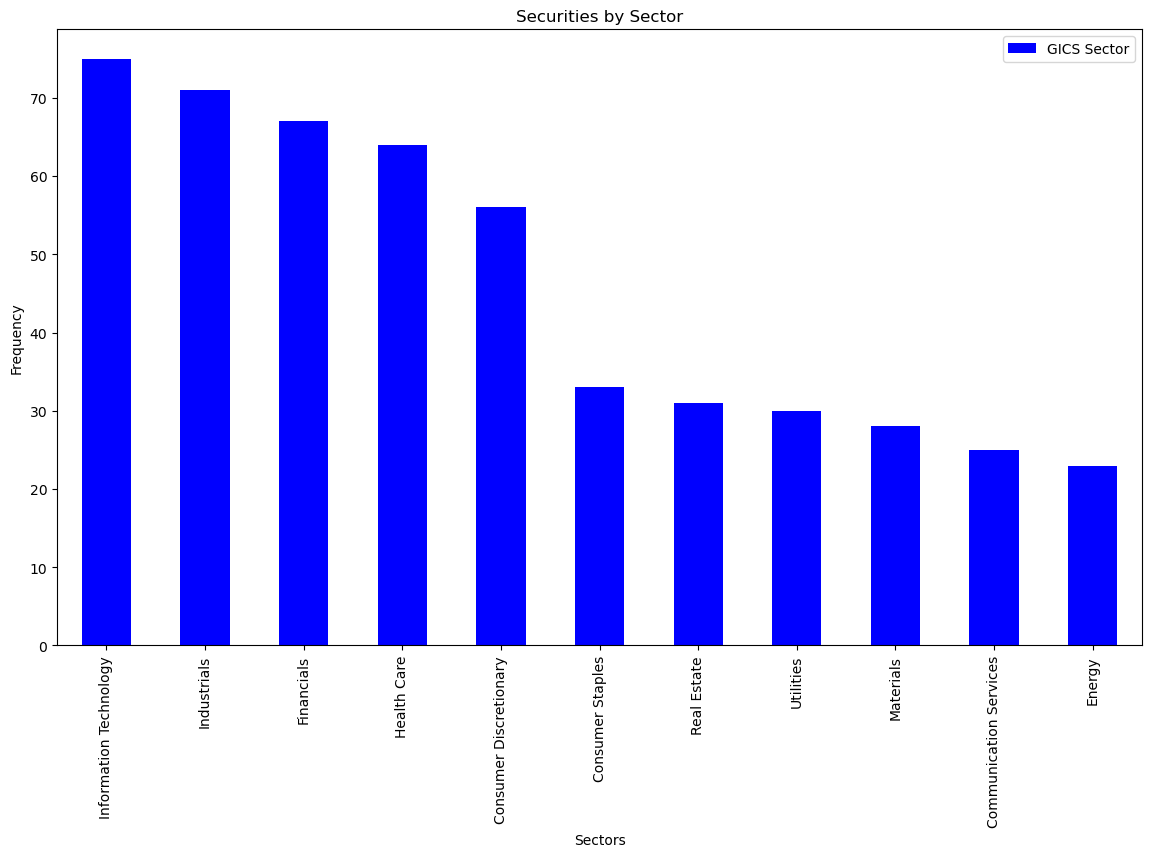

In [53]:
# Data Visualization
ax = csv_df['GICS Sector'].value_counts().plot(kind = 'bar', figsize=(14,8), title="Securities by Sector", color = 'Blue')
ax.set_xlabel("Sectors")
ax.set_ylabel("Frequency")
ax.legend()

In [54]:
# Cleaning existing data from the database
csv_del_query = 'delete from ticker_master where tck_symbol is not null'
mycursor.execute(csv_del_query)
mydb.commit()

In [55]:
#Iterate into the CSV DataFrame
for i,row in csv_df.iterrows():
    #INSERT query for inserting the data into the database
    csv_sql = "INSERT INTO stockassist.ticker_master VALUES (%s,%s,%s,%s,%s,%s,%s)"
    try:
        #Execute the SQL query
        mycursor.execute(csv_sql, tuple(row))
        print('Ticker Master Record inserted')
        #Commit the executed query
        mydb.commit()
    except:
        #Display message if the record already exists inside the table
        print('Ticker Master Record already exists')

Ticker Master Record inserted
Ticker Master Record inserted
Ticker Master Record inserted
Ticker Master Record inserted
Ticker Master Record inserted
Ticker Master Record inserted
Ticker Master Record inserted
Ticker Master Record inserted
Ticker Master Record inserted
Ticker Master Record inserted
Ticker Master Record inserted
Ticker Master Record inserted
Ticker Master Record inserted
Ticker Master Record inserted
Ticker Master Record inserted
Ticker Master Record inserted
Ticker Master Record inserted
Ticker Master Record inserted
Ticker Master Record inserted
Ticker Master Record inserted
Ticker Master Record inserted
Ticker Master Record inserted
Ticker Master Record inserted
Ticker Master Record inserted
Ticker Master Record inserted
Ticker Master Record inserted
Ticker Master Record inserted
Ticker Master Record inserted
Ticker Master Record inserted
Ticker Master Record inserted
Ticker Master Record inserted
Ticker Master Record inserted
Ticker Master Record inserted
Ticker Mas

Ticker Master Record inserted
Ticker Master Record inserted
Ticker Master Record inserted
Ticker Master Record inserted
Ticker Master Record inserted
Ticker Master Record inserted
Ticker Master Record inserted
Ticker Master Record inserted
Ticker Master Record inserted
Ticker Master Record inserted
Ticker Master Record inserted
Ticker Master Record inserted
Ticker Master Record inserted
Ticker Master Record inserted
Ticker Master Record inserted
Ticker Master Record inserted
Ticker Master Record inserted
Ticker Master Record inserted
Ticker Master Record inserted
Ticker Master Record inserted
Ticker Master Record inserted
Ticker Master Record inserted
Ticker Master Record inserted
Ticker Master Record inserted
Ticker Master Record inserted
Ticker Master Record inserted
Ticker Master Record inserted
Ticker Master Record inserted
Ticker Master Record inserted
Ticker Master Record inserted
Ticker Master Record inserted
Ticker Master Record inserted
Ticker Master Record inserted
Ticker Mas

### Data Cleaning on Web Scraping DataFrame

In [56]:
final_web_df.head()

,Symbol,Company,Price,Price_Change_Percent,PE_Ratio,Market_Cap,Volume,Average_Volume
0,MSFT,Microsoft,250.29,+2.0%,26.97,1.87 trillion,"708,717",31.24 million
1,GOOG,Alphabet,92.43,-0.7%,18.36,1.20 trillion,"686,154",28.87 million
2,GOOGL,Alphabet,92.15,-0.7%,18.30,1.19 trillion,"542,311",35.08 million
3,AMZN,Amazon.com,88.81,-0.3%,81.51,906.01 billion,"997,935",76.14 million
4,TSLA,Tesla,170.75,-4.6%,52.76,539.19 billion,1.45 million,82.31 million


In [57]:
# Fetching number of rows and columns
final_web_df.shape

(499, 8)

In [58]:
# Fetching unique values in each column
final_web_df.nunique()

Symbol                  496
Company                 493
Price                   492
Price_Change_Percent     70
PE_Ratio                446
Market_Cap              485
Volume                  495
Average_Volume          402
dtype: int64

In [59]:
# Searching for duplicate entries
final_web_df.duplicated().sum()

3

In [60]:
# Removing duplicate entries from the DataFrame
final_web_df.drop_duplicates(subset="Symbol", keep=False, inplace=True)

In [61]:
# Replacing 'N/A' value with NULL value
final_web_df['PE_Ratio'] = final_web_df['PE_Ratio'].replace('N/A',None)
final_web_df = final_web_df.where((pd.notnull(final_web_df)), None)

In [62]:
final_web_df.head()

,Symbol,Company,Price,Price_Change_Percent,PE_Ratio,Market_Cap,Volume,Average_Volume
0,MSFT,Microsoft,250.29,+2.0%,26.97,1.87 trillion,"708,717",31.24 million
1,GOOG,Alphabet,92.43,-0.7%,18.36,1.20 trillion,"686,154",28.87 million
2,GOOGL,Alphabet,92.15,-0.7%,18.30,1.19 trillion,"542,311",35.08 million
3,AMZN,Amazon.com,88.81,-0.3%,81.51,906.01 billion,"997,935",76.14 million
4,TSLA,Tesla,170.75,-4.6%,52.76,539.19 billion,1.45 million,82.31 million


In [63]:
# Searching for NULL values in the DataFrame
final_web_df.isnull().sum()

Symbol                   0
Company                  0
Price                    0
Price_Change_Percent     2
PE_Ratio                27
Market_Cap               0
Volume                   0
Average_Volume           0
dtype: int64

In [64]:
# Displaying the entries which have NULL values in the DataFrame
print(final_web_df[final_web_df.isnull().any(axis = 1)])

    Symbol                             Company   Price Price_Change_Percent  \
72      BA                              Boeing  184.86                +3.0%   
85      GE                    General Electric   81.92                +0.6%   
205    NUE                               Nucor  147.07                 None   
224    ALL                            Allstate  128.28                -0.2%   
231   ILMN                            Illumina  207.52                +0.9%   
259    BKR                        Baker Hughes   28.09                +3.6%   
264    WBD              Warner Bros. Discovery   11.22                +1.2%   
265    IFF  International Flavors & Fragrances  106.67                -0.6%   
269    BAX                Baxter International   52.58                +0.4%   
295   EBAY                                eBay   43.45                -0.4%   
325    STE                              STERIS  196.77                +2.5%   
331    AES                                 AES   28.

In [65]:
# Displaying final DataFrame after Data Cleaning
final_web_df.head()

,Symbol,Company,Price,Price_Change_Percent,PE_Ratio,Market_Cap,Volume,Average_Volume
0,MSFT,Microsoft,250.29,+2.0%,26.97,1.87 trillion,"708,717",31.24 million
1,GOOG,Alphabet,92.43,-0.7%,18.36,1.20 trillion,"686,154",28.87 million
2,GOOGL,Alphabet,92.15,-0.7%,18.30,1.19 trillion,"542,311",35.08 million
3,AMZN,Amazon.com,88.81,-0.3%,81.51,906.01 billion,"997,935",76.14 million
4,TSLA,Tesla,170.75,-4.6%,52.76,539.19 billion,1.45 million,82.31 million


In [66]:
# Cleaning existing data from the database
web_del_query = 'delete from company_details where cmd_symbol is not null'
mycursor.execute(web_del_query)
mydb.commit()

In [67]:
#Iterate into the Web DataFrame
for i,row in final_web_df.iterrows():
    #INSERT query for inserting the data into the database
    web_sql = "INSERT INTO stockassist.Company_Details VALUES (%s,%s,%s,%s,%s,%s,%s,%s)"
    try:
        #Execute the SQL query
        mycursor.execute(web_sql, tuple(row))
        print(row[0] + ' Company Details Record inserted')
        #Commit the executed query
        mydb.commit()
    except:
        #Display message if the record already exists inside the table
        print(row[0] + ' Company Details Record already exists')

MSFT Company Details Record inserted
GOOG Company Details Record inserted
GOOGL Company Details Record inserted
AMZN Company Details Record inserted
TSLA Company Details Record inserted
UNH Company Details Record inserted
JNJ Company Details Record inserted
XOM Company Details Record inserted
NVDA Company Details Record inserted
V Company Details Record inserted
WMT Company Details Record inserted
JPM Company Details Record inserted
PG Company Details Record inserted
LLY Company Details Record inserted
MA Company Details Record inserted
HD Company Details Record inserted
CVX Company Details Record inserted
META Company Details Record inserted
PFE Company Details Record inserted
ABBV Company Details Record inserted
MRK Company Details Record inserted
KO Company Details Record inserted
BAC Company Details Record inserted
PEP Company Details Record inserted
TMO Company Details Record inserted
AVGO Company Details Record inserted
ORCL Company Details Record inserted
COST Company Details Re

RMD Company Details Record inserted
AME Company Details Record inserted
DLTR Company Details Record inserted
NDAQ Company Details Record inserted
SBAC Company Details Record inserted
WELL Company Details Record inserted
DLR Company Details Record inserted
HAL Company Details Record inserted
PPG Company Details Record inserted
WEC Company Details Record inserted
ALB Company Details Record inserted
CPRT Company Details Record inserted
ON Company Details Record inserted
CTSH Company Details Record inserted
PEG Company Details Record inserted
ROK Company Details Record inserted
GWW Company Details Record inserted
DHI Company Details Record inserted
ES Company Details Record inserted
STT Company Details Record inserted
FAST Company Details Record inserted
OKE Company Details Record inserted
DFS Company Details Record inserted
AWK Company Details Record inserted
BKR Company Details Record inserted
VRSK Company Details Record inserted
HPQ Company Details Record inserted
GLW Company Details Re

CTLT Company Details Record inserted
HAS Company Details Record inserted
DISH Company Details Record inserted
RHI Company Details Record inserted
FBHS Company Details Record inserted
WHR Company Details Record inserted
SBNY Company Details Record inserted
PNR Company Details Record inserted
SEE Company Details Record inserted
NRG Company Details Record inserted
RL Company Details Record inserted
ZION Company Details Record inserted
OGN Company Details Record inserted
AIZ Company Details Record inserted
DVA Company Details Record inserted
MHK Company Details Record inserted
NCLH Company Details Record inserted
XRAY Company Details Record inserted
DXC Company Details Record inserted
GNRC Company Details Record inserted
LUMN Company Details Record inserted
ALK Company Details Record inserted
NWL Company Details Record inserted
LNC Company Details Record inserted
PENN Company Details Record inserted
PVH Company Details Record inserted
VNO Company Details Record inserted
EMBC Company Detail

### Data Cleaning on API DataFrame

In [68]:
daily_df.head()

,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2022-01-12,AAPL,174.517136,175.529999,177.179993,174.820007,176.119995,74805200
1,2022-01-12,AMZN,165.207001,165.207001,166.878006,164.417007,166.574997,50030000
2,2022-01-12,MSFT,315.315430,318.269989,323.410004,317.079987,319.670013,34372200
3,2022-01-12,TSLA,368.739990,368.739990,371.613342,357.529999,359.616669,83739000
4,2022-01-13,AAPL,171.196411,172.190002,176.619995,171.789993,175.779999,84505800


In [69]:
hourly_df.head()

,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2022-12-12 09:30:00,AAPL,142.125000,142.125000,142.880005,141.639999,142.750000,12413959.0
1,2022-12-12 09:30:00,AMZN,88.535004,88.535004,89.400002,88.410103,89.385002,12155530.0
2,2022-12-12 09:30:00,MSFT,250.779907,250.779907,252.160004,245.419998,245.419998,6879444.0
3,2022-12-12 09:30:00,TSLA,172.244995,172.244995,179.050003,170.949997,177.000000,25850596.0
4,2022-12-12 10:30:00,AAPL,142.130005,142.130005,142.470001,141.059998,142.125000,9867207.0


In [70]:
# Fetching number of rows and columns
daily_df.shape

(924, 8)

In [71]:
hourly_df.shape

(16, 8)

In [72]:
# Fetching unique values in each column
daily_df.nunique()

Date         231
Ticker         4
Adj Close    916
Close        907
High         906
Low          907
Open         906
Volume       924
dtype: int64

In [73]:
hourly_df.nunique()

Date          6
Ticker        4
Adj Close    16
Close        16
High         16
Low          16
Open         16
Volume       13
dtype: int64

In [74]:
# Searching for duplicate entries
daily_df.duplicated().sum()

0

In [75]:
hourly_df.duplicated().sum()

0

In [76]:
# Searching for NULL values in the DataFrame
daily_df.isnull().sum()

Date         0
Ticker       0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

In [77]:
hourly_df.isnull().sum()

Date         0
Ticker       0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

In [78]:
# Displaying final DataFrame after Data Cleaning
daily_df.head()

,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2022-01-12,AAPL,174.517136,175.529999,177.179993,174.820007,176.119995,74805200
1,2022-01-12,AMZN,165.207001,165.207001,166.878006,164.417007,166.574997,50030000
2,2022-01-12,MSFT,315.315430,318.269989,323.410004,317.079987,319.670013,34372200
3,2022-01-12,TSLA,368.739990,368.739990,371.613342,357.529999,359.616669,83739000
4,2022-01-13,AAPL,171.196411,172.190002,176.619995,171.789993,175.779999,84505800


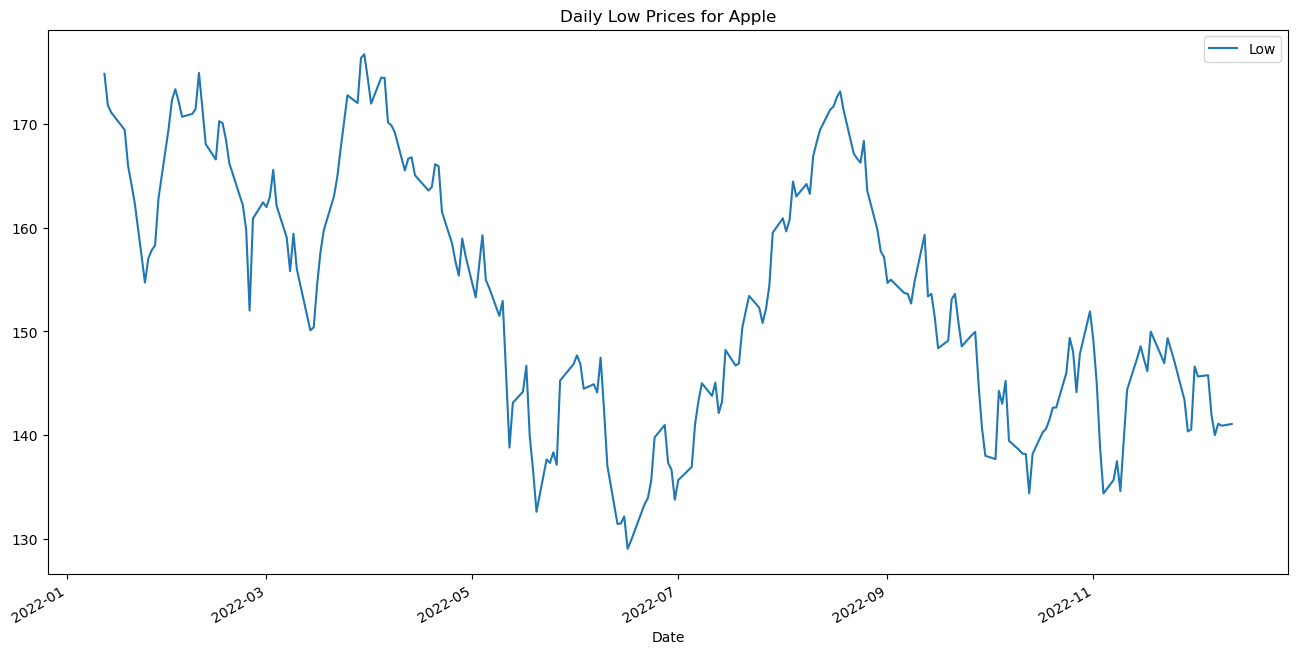

In [79]:
# Data Visualization
a = daily_df[daily_df.Ticker == 'AAPL'].plot(x = 'Date', y = 'Low', title = 'Daily Low Prices for Apple', figsize=(16,8))
a.legend()

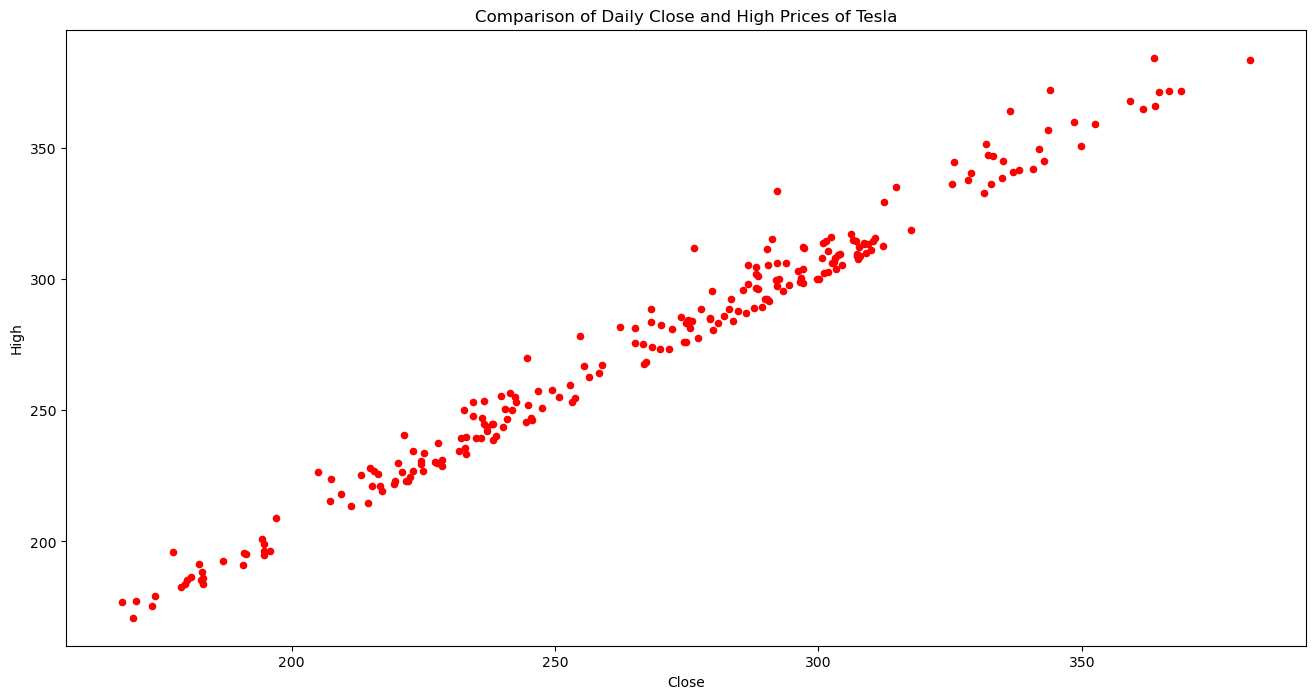

In [80]:
b = daily_df[daily_df.Ticker == 'TSLA'].plot(kind='scatter',x='Close',y='High', title = 'Comparison of Daily Close and High Prices of Tesla', figsize=(16,8), color='red')

In [81]:
hourly_df.head()

,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2022-12-12 09:30:00,AAPL,142.125000,142.125000,142.880005,141.639999,142.750000,12413959.0
1,2022-12-12 09:30:00,AMZN,88.535004,88.535004,89.400002,88.410103,89.385002,12155530.0
2,2022-12-12 09:30:00,MSFT,250.779907,250.779907,252.160004,245.419998,245.419998,6879444.0
3,2022-12-12 09:30:00,TSLA,172.244995,172.244995,179.050003,170.949997,177.000000,25850596.0
4,2022-12-12 10:30:00,AAPL,142.130005,142.130005,142.470001,141.059998,142.125000,9867207.0


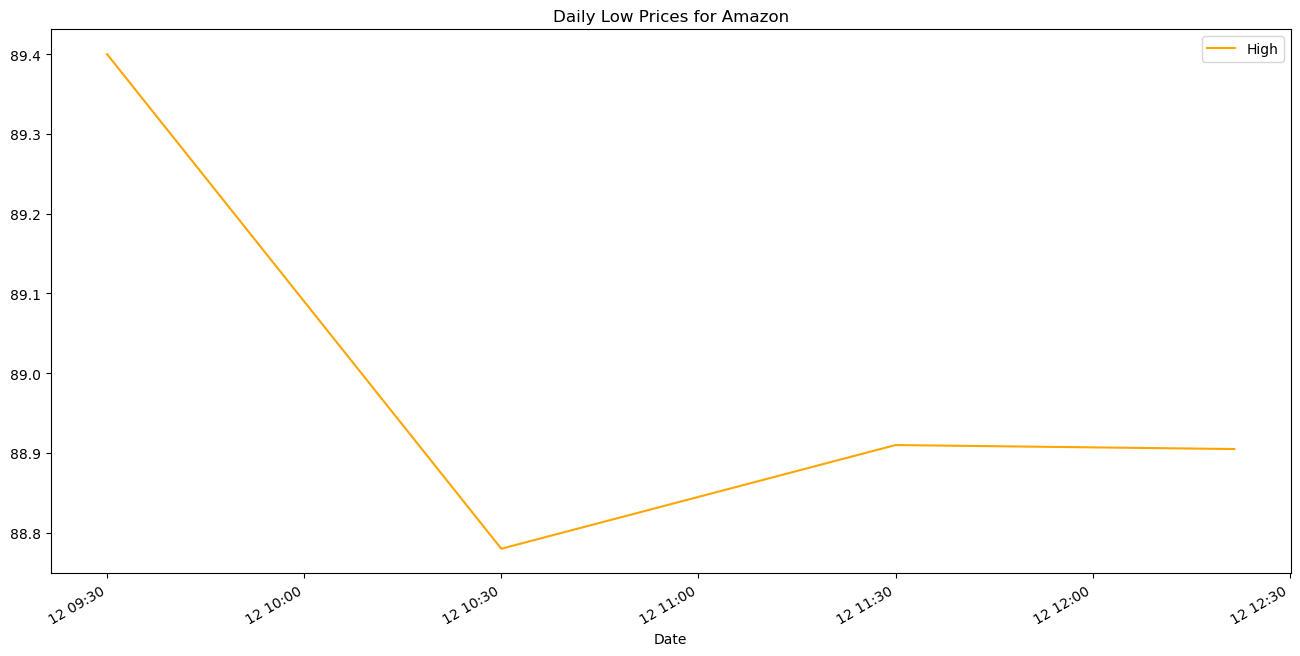

In [82]:
# Data Visualization
c = hourly_df[hourly_df.Ticker == 'AMZN'].plot(x = 'Date', y = 'High', title = 'Daily Low Prices for Amazon', figsize=(16,8), color = 'orange')

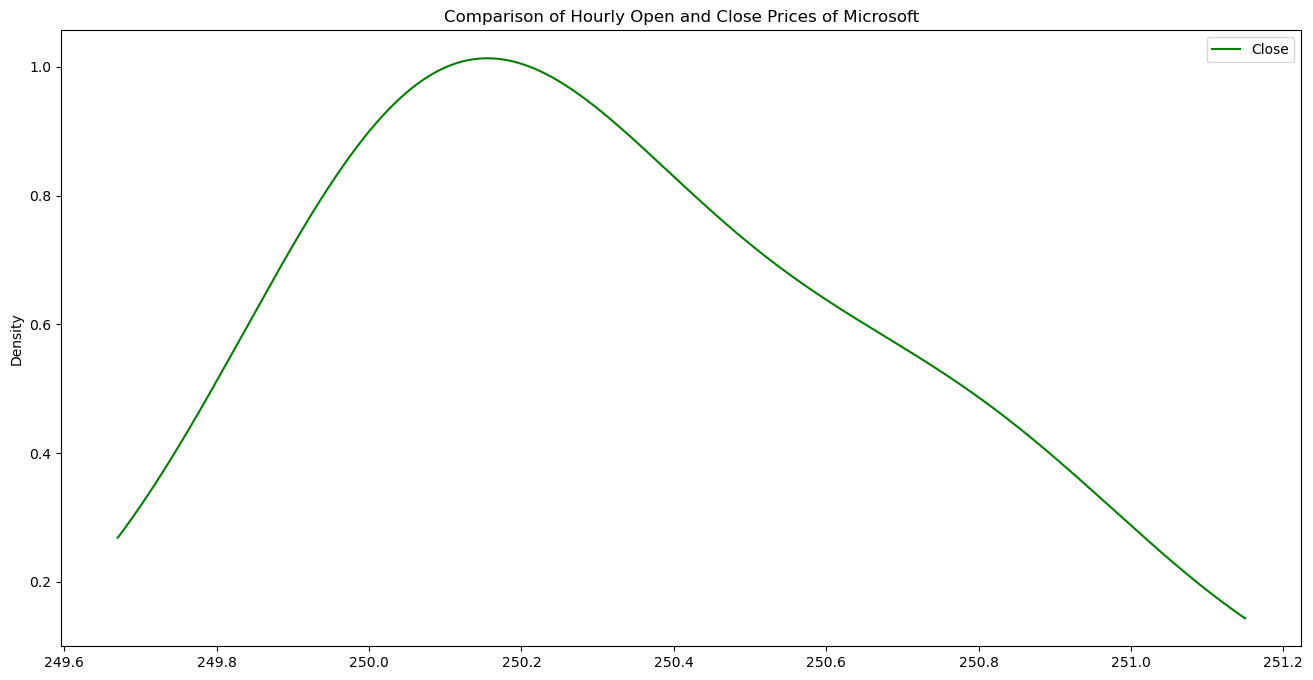

In [83]:
b = hourly_df[hourly_df.Ticker == 'MSFT'].plot(kind='kde', x='Open', y='Close', title = 'Comparison of Hourly Open and Close Prices of Microsoft', figsize=(16,8), color='green')

In [84]:
# Cleaning existing data from the database
web_del_query = 'delete from daily_prices where dp_id is not null'
mycursor.execute(web_del_query)
mydb.commit()

In [85]:
# Cleaning existing data from the database
web_del_query = 'delete from hourly_prices where hp_id is not null'
mycursor.execute(web_del_query)
mydb.commit()

In [86]:
#Iterate into the Daily DataFrame
for i,row in daily_df.iterrows():
    #INSERT query for inserting the data into the database
    daily_price_sql = "INSERT INTO stockassist.daily_prices(dp_date,dp_ticker,dp_adj_close,dp_close,dp_high,dp_low,dp_open,dp_volume) VALUES (%s,%s,%s,%s,%s,%s,%s,%s)"
    try:
        #Execute the SQL query
        mycursor.execute(daily_price_sql, tuple(row))
        print('Daily Price Record inserted')
        #Commit the executed query
        mydb.commit()

    except:
        #Display message if the record already exists inside the table
        print('Daily Price Record already exists')


Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record i

Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record i

Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record i

Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted
Daily Price Record inserted


In [87]:
#Iterate into the Hourly DataFrame
for i,row in hourly_df.iterrows():
    #INSERT query for inserting the data into the database
    hourly_sql = "INSERT INTO stockassist.hourly_prices(hp_date,hp_ticker,hp_adj_close,hp_close,hp_high,hp_low,hp_open,hp_volume) VALUES (%s,%s,%s,%s,%s,%s,%s,%s)"
    try:
        #Execute the SQL query
        mycursor.execute(hourly_sql, tuple(row))
        print('Hourly Price Record inserted')
        #Commit the executed query
        mydb.commit()

    except:
        #Display message if the record already exists inside the table
        print('Hourly Price Record already exists')


Hourly Price Record inserted
Hourly Price Record inserted
Hourly Price Record inserted
Hourly Price Record inserted
Hourly Price Record inserted
Hourly Price Record inserted
Hourly Price Record inserted
Hourly Price Record inserted
Hourly Price Record inserted
Hourly Price Record inserted
Hourly Price Record inserted
Hourly Price Record inserted
Hourly Price Record inserted
Hourly Price Record inserted
Hourly Price Record inserted
Hourly Price Record inserted
